In [1]:
import numpy as np
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from acquire import getData
import acquire as acq

In [2]:
df_iris = data('iris')
df_iris.head(3)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [3]:
df_iris.shape

(150, 5)

In [4]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
#ALT
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
df_iris.describe()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df_excel = pd.read_csv('Telco_plus.csv')
df_excel.head(2)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.3,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.4,No,9.1


In [9]:
df_excel_sample = df_excel.head(100) 
# df2 = df_excel.iloc[:100,:] #ALT


In [10]:
#number of rows in original dataframe
df_excel.shape[0]

7049

In [11]:
#first 5 columns
df_excel.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [12]:
#print columns that are objects
for i in df_excel.columns:
    if df_excel[i].dtype == object: print(i)

customer_id
gender
partner
dependents
payment_type
churn


In [13]:
#ALT print column objects
df_excel.select_dtypes(object).columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [14]:
#Calculate range for numeric variables (doing all int/float, not filtering out those that are actually categories)
for i in df_excel.columns:
    if df_excel[i].dtype == int or df_excel[i].dtype == float:
        rng = df_excel[i].max() - df_excel[i].min()
        print(f'{i} range: {rng}')


is_senior_citizen range: 1
phone_service range: 2
internet_service range: 2
contract_type range: 2
monthly_charges range: 100.5
total_charges range: 8666.0
tenure range: 79.3


In [15]:
#ALT way to get range:
df_excel.select_dtypes(include=[int,float]).max()-df_excel.select_dtypes(include=[int,float]).min()

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
tenure                 79.3
dtype: float64

In [16]:
#From Google Sheets
url="https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357"
url = url.replace('edit#gid=','export?format=csv&gid=')
df_google = pd.read_csv(url)
df_google.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
df_google.shape

(891, 12)

In [18]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
cats = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
for i in cats:
    print(f'{i} categories: {df_google[i].unique()}')

Survived categories: [0 1]
Pclass categories: [3 1 2]
Sex categories: ['male' 'female']
SibSp categories: [1 0 3 4 2 5 8]
Parch categories: [0 1 2 5 3 4 6]
Embarked categories: ['S' 'C' 'Q' nan]


## Preparation Exercises

### Titanic Dataset

In [2]:
df = df_backup = acq.getData('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [3]:
print(pd.crosstab(df['class'],df.pclass))  #same info, we can drop one
print(f'\n{pd.crosstab(df.parch,df.alone)}')
#Alone flag numbers don't seem to align with sibsp or parch.  
#Would check if related to only 1 passenger per cabin number 
# - but this dataset doesn't contain the cabin number

pclass    1    2    3
class                
First   216    0    0
Second    0  184    0
Third     0    0  491

alone    0    1
parch          
0      141  537
1      118    0
2       80    0
3        5    0
4        4    0
5        5    0
6        1    0


In [4]:
pd.crosstab(df.embarked,df.embark_town) #duplicate columns

embark_town,Cherbourg,Queenstown,Southampton
embarked,,,
C,168,0,0
Q,0,77,0
S,0,0,644


In [5]:
df.drop_duplicates(inplace=True)
df.shape #no duplicates

(891, 13)

#### Gather our takeaways, i.e., what we are going to do when we clean:
- Target: want to predict survival
- Cleaning to do:
  - Drop pclass: duplicate Data, but want pclass column name and class's categorical values
  - Drop passenger_id: only would be valuable as it relates to other attributes
  - Drop embarked or embarked_town, they are duplicates
  - Drop Deck, it is ~70% nulls

- To consider further: age has a few nulls

In [6]:
df.drop(inplace=True,columns=['pclass','passenger_id','embarked','deck'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   sex          891 non-null    object 
 2   age          714 non-null    float64
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   class        891 non-null    object 
 7   embark_town  889 non-null    object 
 8   alone        891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


#### Nulls (round 1)
- drop rows with 2 embark nulls
- age nulls should wait as we want to fill them in after splitting 

In [8]:
df.dropna(subset=['embark_town']).info() 
#awesome, works by just dropping rows with null in embark

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   sex          889 non-null    object 
 2   age          712 non-null    float64
 3   sibsp        889 non-null    int64  
 4   parch        889 non-null    int64  
 5   fare         889 non-null    float64
 6   class        889 non-null    object 
 7   embark_town  889 non-null    object 
 8   alone        889 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [9]:
df.dropna(subset=['embark_town'],inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   sex          889 non-null    object 
 2   age          712 non-null    float64
 3   sibsp        889 non-null    int64  
 4   parch        889 non-null    int64  
 5   fare         889 non-null    float64
 6   class        889 non-null    object 
 7   embark_town  889 non-null    object 
 8   alone        889 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


#### Encoding
- Sex and embarkation town


In [47]:
d_df = pd.get_dummies(df[['embark_town','sex','class']],drop_first=[True, True])
d_df.head(2)

,embark_town_Queenstown,embark_town_Southampton,sex_male,class_Second,class_Third
0,0,1,1,0,1
1,0,0,0,0,0


In [48]:
#concat dummy df to dataframe
df = pd.concat([df,d_df],axis=1)
df.head(2)

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male,embark_town_Queenstown,embark_town_Southampton,sex_male,class_Second,class_Third
0,0,male,22.0,1,0,7.2500,Third,Southampton,0,0,1,1,0,1,1,0,1
1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,0,0,0,0,0,0,0,0


In [ ]:
#rename class just in case
df.rename(columns={'class':'pclass'},inplace=True)

#### Drop into a Function

In [49]:
def prep_titanic(df):
    #Drop un-needed columns
    df.drop(inplace=True,columns=['pclass','passenger_id','embarked','deck'])
    #Drop minimal nulls from embark town
    df.dropna(subset=['embark_town'],inplace=True)
    #Encode embark_town, sex and class >> concat
    d_df = pd.get_dummies(df[['embark_town','sex','class']],drop_first=[True, True])
    df = pd.concat([df,d_df],axis=1)
    #rename class just in case
    df.rename(columns={'class':'pclass'},inplace=True)
    return df

In [51]:
df = acq.getData('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [52]:
df = prep_titanic(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 889 non-null    int64  
 1   sex                      889 non-null    object 
 2   age                      712 non-null    float64
 3   sibsp                    889 non-null    int64  
 4   parch                    889 non-null    int64  
 5   fare                     889 non-null    float64
 6   pclass                   889 non-null    object 
 7   embark_town              889 non-null    object 
 8   alone                    889 non-null    int64  
 9   embark_town_Queenstown   889 non-null    uint8  
 10  embark_town_Southampton  889 non-null    uint8  
 11  sex_male                 889 non-null    uint8  
 12  class_Second             889 non-null    uint8  
 13  class_Third              889 non-null    uint8  
dtypes: float64(2), int64(4), o

### Iris Dataset

In [14]:
idf = acq.getData('iris')

In [15]:
idf.info()
# no Nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [16]:
pd.crosstab(idf.species_id,idf.species_name)

species_name,setosa,versicolor,virginica
species_id,,,
1,50,0,0
2,0,50,0
3,0,0,50


In [17]:
idf.describe().T

,count,mean,std,min,25%,50%,75%,max
species_id,150.0,2.000000,0.819232,1.0,1.00,2.00,3.00,3.0
measurement_id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
sepal_length,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.80,3.00,3.30,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.60,4.35,5.10,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.30,1.30,1.80,2.5


(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

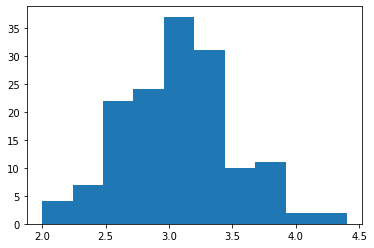

In [20]:
plt.hist(idf.sepal_width)

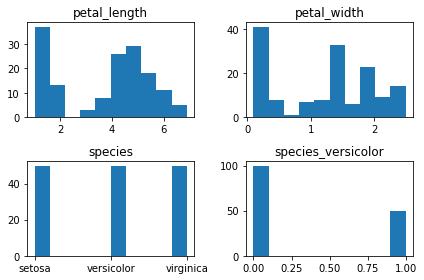

In [43]:
plt.figure()
ct = 0
for i in idf.columns[2:6]:
    ct +=1
    plt.subplot(2,2,ct)
    plt.hist(idf[i])
    plt.title(i)
plt.tight_layout()

##### Cleaning to do:
- No Nulls, so good there
- Outliers for sepal/petal length/width are fine
- TO DROP:
  - species_id (duplicate of species name)
  - measurement_id (primary key, don't need)

In [23]:
idf.drop(inplace=True,columns=['species_id','measurement_id'])
idf.shape

(150, 5)

In [26]:
idf.rename(columns={"species_name":"species"},inplace=True)

In [27]:
idf.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

#### Encode
- Encode species_name: but don't technically need to do this as the target

In [29]:
d_idf = pd.get_dummies(idf[['species']],drop_first=True)

In [30]:
d_idf.head(2)

,species_versicolor,species_virginica
0,0,0
1,0,0


In [ ]:
idf = pd.concat([idf,d_idf],axis=1)

#### Drop into a function

In [40]:
def prep_iris(idf):
    #drop id columns:
    idf.drop(inplace=True,columns=['species_id','measurement_id'])
    #rename species column:
    idf.rename(columns={"species_name":"species"},inplace=True)
    #encode species:
    d_idf = pd.get_dummies(idf[['species']],drop_first=True)
    #concat to dataframe
    idf = pd.concat([idf,d_idf],axis=1)
    return idf

#### Test function

In [41]:
idf = acq.getData('iris')
idf.head(2)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa


In [42]:
idf = prep_iris(idf)
idf.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0


### Telco Dataset